# Owner Analysis

Most of these functions are for the paper: 'Hiding in Housing'

In [1]:
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import numpy as np
import csv
import re

### Find One Property Owners
This function is used to find owners that own only one property.

In [ ]:
def find_one_prop_owners(source):
    data = json.load(open(source))
    count = 0
    for owner in tqdm(data, total=len(data)):
        if owner[1] == 1:
            count += 1
    percentage = (count / len(data)) * 100
    print('There are ', count, 'one property owners in this dataset.')
    print("That's ", percentage, '% of total owners.')

In [ ]:
find_one_prop_owners('./../../data_sets/sorted_landlords.json')

### Find owner_2
This function is used to find and count properties with 2 owners.

In [103]:
def get_owner_2_count(source, output):
    owners = []
    owner2_count = 0
    with open(source, mode="r") as csv_file:
        csv_reader = csv.DictReader(csv_file)
        line_count = 0
        for row in tqdm(csv_reader, total=581456):
            if line_count == 0:
                line_count += 1
            else:
                try:
                    owners.append([row["owner_1"].strip(), row["owner_2"].strip()])
                    if (row["owner_2"].strip() == ""):
                        owner2_count += 1
                except:
                     print(row["owner_1"].strip(), "is missing a count.")
    with open(output, 'w') as file:
        file.write(json.dumps(owners))
    print('There are ', owner2_count, 'owner_2s in this dataset.')

In [104]:
get_owner_2_count('./../../data_sets/opa_properties_public.csv', './data/owner1_owner2.json')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 581456/581456 [00:07<00:00, 74223.28it/s]


There are  376528 owner_2s in this dataset.


### Get Owners and Mailing Addresses
This function will create a list that holds both owners and the mailing address.

In [105]:
def get_owners_and_mailing_address(source, output):
    owners_with_mailing_address = []
    mailing_address_count = 0
    with open(source, mode="r") as csv_file:
        csv_reader = csv.DictReader(csv_file)
        line_count = 0
        owner_1_count = 0
        owner_2_count = 0
        mailing_address_1_count = 0
        mailing_address_2_count = 0
        mailing_care_of_count = 0
        mailing_city_state_count = 0
        mailing_street_count = 0
        mailing_zip_count = 0
        for row in tqdm(csv_reader, total=581456):
            if line_count == 0:
                line_count += 1
            else:
                line_count += 1
            
                owner_1 = row["owner_1"].strip()
                owner_2 = row["owner_2"].strip()
                mailing_address_1 = row["mailing_address_1"].strip()
                mailing_address_2 = row["mailing_address_2"].strip()
                mailing_care_of = row["mailing_care_of"].strip()
                mailing_city_state = row["mailing_city_state"].strip()
                mailing_street = row["mailing_street"].strip()
                mailing_zip = row["mailing_zip"].strip()
                mailing_info = [
                    mailing_address_1,
                    mailing_address_2,
                    mailing_care_of,
                    mailing_city_state,
                    mailing_street,
                    mailing_zip
                ]
                owners_with_mailing_address.append([owner_1, owner_2, mailing_info])
                if (owner_1 != ""):
                    owner_1_count += 1
                if (owner_2 != ""):
                    owner_2_count += 1
                if (mailing_address_1 != ""):
                    mailing_address_1_count += 1
                if (mailing_address_2 != ""):
                    mailing_address_2_count += 1
                if (mailing_care_of != ""):
                    mailing_care_of_count += 1
                if (mailing_city_state != ""):
                    mailing_city_state_count += 1
                if (mailing_street != ""):
                    mailing_street_count += 1
                if (mailing_zip != ""):
                    mailing_zip_count += 1

    with open(output, 'w') as file:
        file.write(json.dumps(owners_with_mailing_address))
    line_count -= 1 # need to account for the first line in the csv
    print('There are ', line_count, 'properties in this dataset.')
    print('There are ', owner_1_count, 'owner_1s in this dataset or ', (owner_1_count/line_count)*100, ' %.')
    print('There are ', owner_2_count, 'owner_2s in this dataset or ', (owner_2_count/line_count)*100, ' %.')
    print('There are ', mailing_address_1_count, 'mailing_address_1s in this dataset or ', (mailing_address_1_count/line_count)*100, ' %.')
    print('There are ', mailing_address_2_count, 'mailing_address_2s in this dataset or ', (mailing_address_2_count/line_count)*100, ' %.')
    print('There are ', mailing_care_of_count, 'mailing_care_ofs in this dataset or ', (mailing_care_of_count/line_count)*100, ' %.')
    print('There are ', mailing_city_state_count, 'mailing_city_states in this dataset or ', (mailing_city_state_count/line_count)*100, ' %.')
    print('There are ', mailing_street_count, 'mailing_streets in this dataset or ', (mailing_street_count/line_count)*100, ' %.')
    print('There are ', mailing_zip_count, 'mailing_zips in this dataset or ', (mailing_zip_count/line_count)*100, ' %.')
    
    

In [106]:
get_owners_and_mailing_address('./../../data_sets/opa_properties_public.csv', './data/owners_mailing_address.json')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 581456/581456 [00:08<00:00, 69535.78it/s]


There are  581455 properties in this dataset.
There are  581455 owner_1s in this dataset or  100.0  %.
There are  204927 owner_2s in this dataset or  35.24382798324892  %.
There are  32299 mailing_address_1s in this dataset or  5.554858071561858  %.
There are  11185 mailing_address_2s in this dataset or  1.9236226363175137  %.
There are  23098 mailing_care_ofs in this dataset or  3.972448426791411  %.
There are  220035 mailing_city_states in this dataset or  37.842137396703095  %.
There are  220037 mailing_streets in this dataset or  37.84248136141232  %.
There are  219783 mailing_zips in this dataset or  37.798797843341276  %.


### Combine Owner Truncation LLC findings
This combines the possible 'L's that are now LLCs

In [8]:
def combine(source, l_source, output):
    data = json.load(open(source))
    l_data = json.load(open(l_source))
    out = []
    count = 0
    for owner in tqdm(data, total=len(data)):
        owner_name = owner[0]
        prop_count = owner[1]
        found_flag = False
        for trunc_owner in l_data:
            if owner_name in trunc_owner.keys():
                correct_owner_name = trunc_owner[owner_name]
                out.append([correct_owner_name, prop_count])
                found_flag = True
                count += 1
                break
        if found_flag == False:
            out.append([owner_name, prop_count])
            count += 1
    json.dump(out, open(output, 'w+'))
    print(count)
        

In [9]:
combine('./../../data_sets/sorted_landlords.json', './data/annotated_fuzzy_L_results.JSON', './data/llc_owner_combined.json')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 429983/429983 [00:22<00:00, 19354.29it/s]


429983


### Find LLC Owners
This function will find LLC owners and count them.
It will take 'L' data from the LLCs that were truncated and found by hand, rather than the possibly incorrect 'L' assuming happening before this change.

In [12]:
def find_llc_owners(source, output):
    data = json.load(open(source))
    out = []
    count = 0
    property_count = 0
    LL_count = 0
    LLC_count = 0
    
    raw_search_string_LL = r"\b" + "LL" + r"\b$"
    raw_search_string_LLC = r"\b" + "LLC" + r"\b"
    
    for owner in tqdm(data, total=len(data)):
        match_output_LLC = re.search(raw_search_string_LLC, owner[0])
        match_output_LL = re.search(raw_search_string_LL, owner[0])
        
        if match_output_LLC is not None or match_output_LL is not None:
            out.append(owner)
            count += 1
            property_count += owner[1]
            
            if match_output_LLC is not None:
                LLC_count += 1
            if match_output_LL is not None:
                LL_count += 1

    json.dump(out, open(output, 'w+'))
    
    llc_owner_count_percentage = (count/len(data))*100
    property_count_percentage = (property_count / 581455)*100
    average_properties_owned = property_count / count
    
    possible_LLC_total = LLC_count + LL_count
    percentage_of_LLC = (LLC_count/possible_LLC_total) * 100
    percentage_of_LL = (LL_count/possible_LLC_total) * 100
    
    print('There are ', count, 'LLCs in this dataset or ', llc_owner_count_percentage, '% of owners.')
    print('LLCs own ', property_count, 'properties or ', property_count_percentage, '% of properties.') # hard number sourced from previous function
    print('On Average, LLCs own ', average_properties_owned, 'properties.')
    print('\n')
    print('Using Regex I found ', percentage_of_LLC, '% of the findings have "LLC" in their owner_1.')
    print('Using Regex I found ', percentage_of_LL, '% of the findings have "LL" at the end of their owner_1.')

In [13]:
find_llc_owners('./../../data_sets/sorted_landlords.json', './data/llc_owner.json')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 429983/429983 [00:00<00:00, 563813.20it/s]


There are  17489 LLCs in this dataset or  4.067370105329745 % of owners.
LLCs own  19768 properties or  3.3997471859387227 % of properties.
On Average, LLCs own  1.1303104808736921 properties.


Using Regex I found  95.64297558465321 % of the findings have "LLC" in their owner_1.
Using Regex I found  4.357024415346789 % of the findings have "LL" at the end of their owner_1.


### Generate JSON that Contains LLC Owners and properties


In [ ]:
def get_llc_and_props(source, llc_source, l_source, output):
    out = {}
    data = json.load(open(source))
    llc_data = json.load(open(llc_source))
    l_data = json.load(open(l_source))
    
    for owner in tqdm(data, total=len(data)):
        

In [ ]:
get_llc_and_props('./../../data_sets/landlords_and_properties.json', output)

### Create Bar Chart of Top Owners
This function will output a chart of the cities largest property owners

In [80]:
def create_top_owner_bar_chart(source):
    data = json.load(open(source))
    prop_owner = []
    prop_count = []
    for owner in tqdm(data, total=len(data)):
        prop_owner.append(owner[0])
        prop_count.append(owner[1])
    fig, ax = plt.subplots(figsize=(10,10))
    ax.barh(prop_owner, prop_count)
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='center')
    ax.set(xlim=[0, 4300], xlabel='Number of Properties Owned', ylabel='Owner',
       title='Top Property Owners')
    for i, v in enumerate(prop_count):
        ax.text(v+3, i-.25, str(v), color='black')
    fig.savefig('./figures/top_owners.png', transparent=False, dpi=80, bbox_inches="tight")
    plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 45893.91it/s]


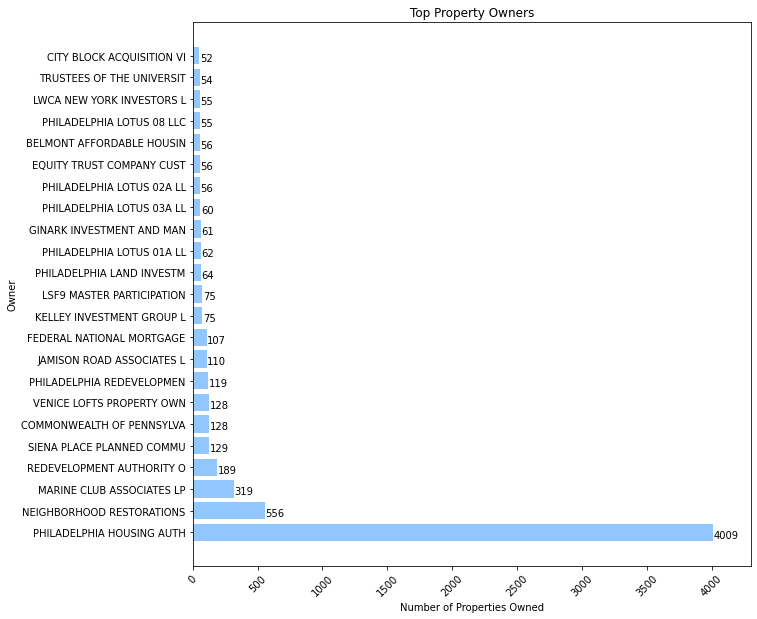

In [81]:
create_top_owner_bar_chart('./../../data_sets/significant_sorted_landlords.json')